In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [2]:
df=pd.read_excel("Ex2.xlsx", sheet_name="Sheet5")
df.head()

,Index,Name,Gender,Designation,Age,Experience,Cost involved in recruiting,Induction program cost,New hires performance satisfaction,Time to fill,...,Performance Differential,Performance rating,Type of Training,Hours of trg,Content Satisfaction,Skill development,Knowledge level,Score,Total Score,Average score
0,1,Liam,Male,Producer,37,1,400,800,35,30,...,25,3,2,25,2,1,1,3,10,2.0
1,2,Olivia,Female,Cinematographer (Director of Photography),48,13,500,1200,75,25,...,15,3,2,13,3,3,1,2,12,2.4
2,3,Noah,Male,Director,24,8,450,900,85,18,...,15,3,1,8,3,2,2,1,11,2.2
3,4,Emma,Female,Editor,56,10,600,1100,60,34,...,30,1,1,9,3,1,1,1,7,1.4
4,5,Ava,Female,Art Director,42,14,250,600,40,22,...,5,3,1,15,3,1,1,2,10,2.0


In [3]:
df1=df[["Age","Experience","Cost involved in recruiting","Induction program cost","New hires performance satisfaction","Time to fill","Sourcing Channel"]]
df1.head()

,Age,Experience,Cost involved in recruiting,Induction program cost,New hires performance satisfaction,Time to fill,Sourcing Channel
0,37,1,400,800,35,30,1
1,48,13,500,1200,75,25,2
2,24,8,450,900,85,18,3
3,56,10,600,1100,60,34,4
4,42,14,250,600,40,22,5


<Axes: >

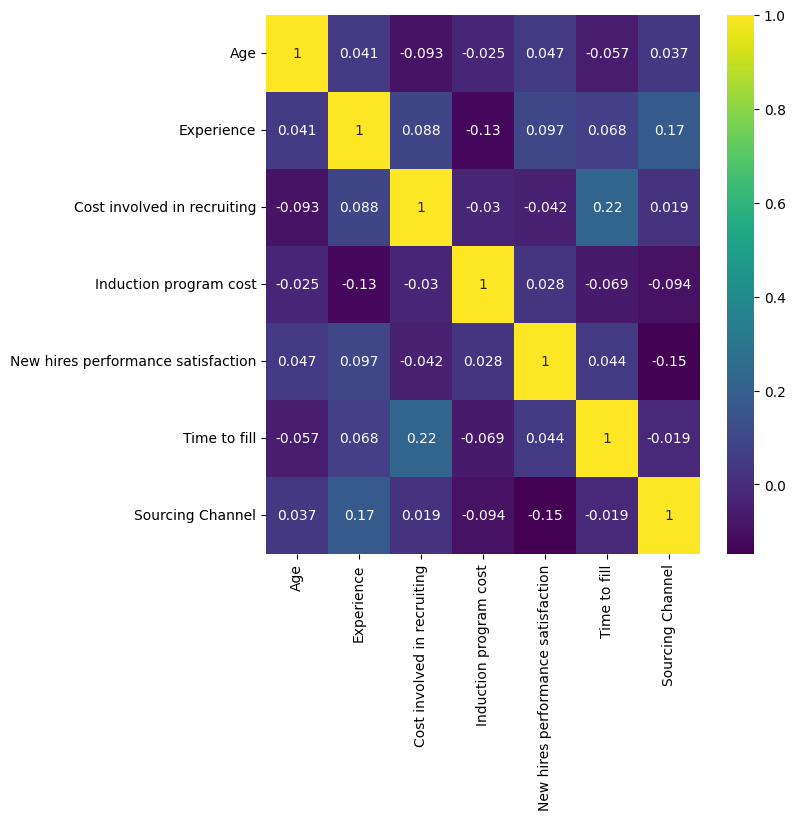

In [4]:
correlation=df1.corr()
plt.figure(figsize=(7,7))
sns.heatmap(correlation,annot=True,cmap='viridis')

Text(0, 0.5, 'Relationship Between colleagues')

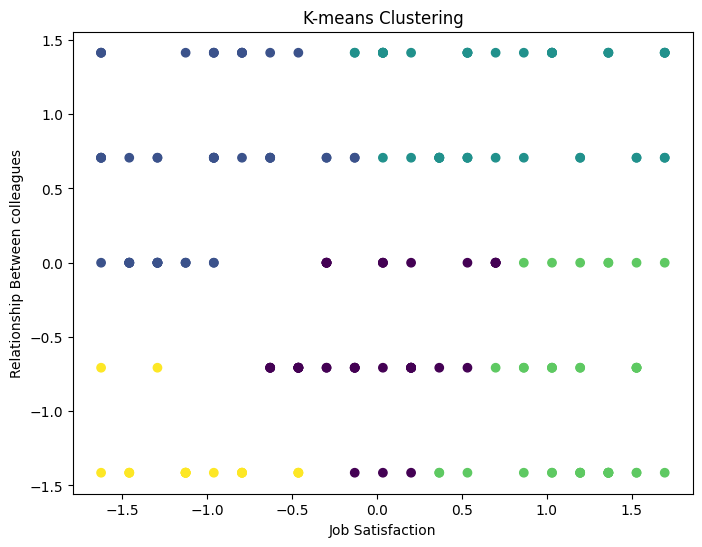

In [5]:
scaler = StandardScaler()
scaled= scaler.fit_transform(df[['Time to fill','Sourcing Channel']])

scaled_df = pd.DataFrame(scaled, columns=['Time to fill','Sourcing Channel'])
scaled_df.head()
k_opt=5
model = KMeans(n_clusters=k_opt,random_state =42,n_init=20)
model.fit(scaled_df)

scaled_df['labels'] = model.labels_
cluster_centers = model.cluster_centers_

plt.figure(figsize=(8, 6))
plt.scatter(scaled_df['Time to fill'], scaled_df['Sourcing Channel'] , c=scaled_df['labels'], cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Job Satisfaction')
plt.ylabel('Relationship Between colleagues')

Text(0, 0.5, 'Relationship Between colleagues')

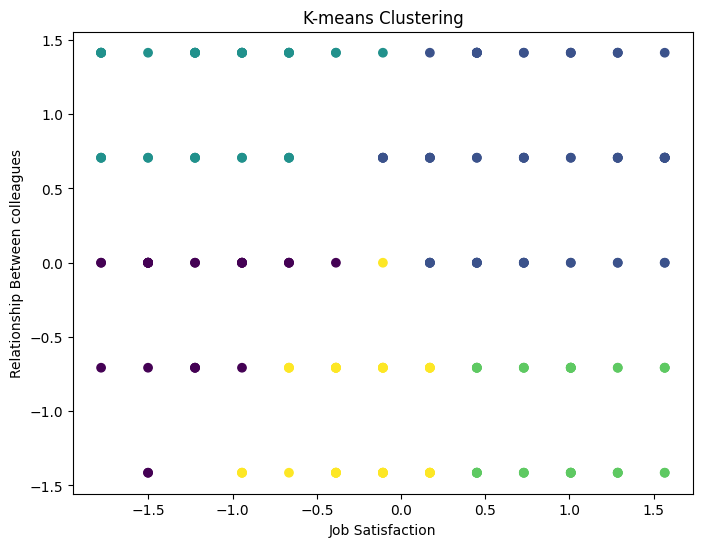

In [6]:
scaler = StandardScaler()
scaled= scaler.fit_transform(df[['New hires performance satisfaction','Sourcing Channel']])

scaled_df = pd.DataFrame(scaled, columns=['New hires performance satisfaction','Sourcing Channel'])
scaled_df.head()
k_opt=5
model = KMeans(n_clusters=k_opt,random_state =42,n_init=20)
model.fit(scaled_df)

scaled_df['labels'] = model.labels_
cluster_centers = model.cluster_centers_

plt.figure(figsize=(8, 6))
plt.scatter(scaled_df['New hires performance satisfaction'], scaled_df['Sourcing Channel'] , c=scaled_df['labels'], cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Job Satisfaction')
plt.ylabel('Relationship Between colleagues')

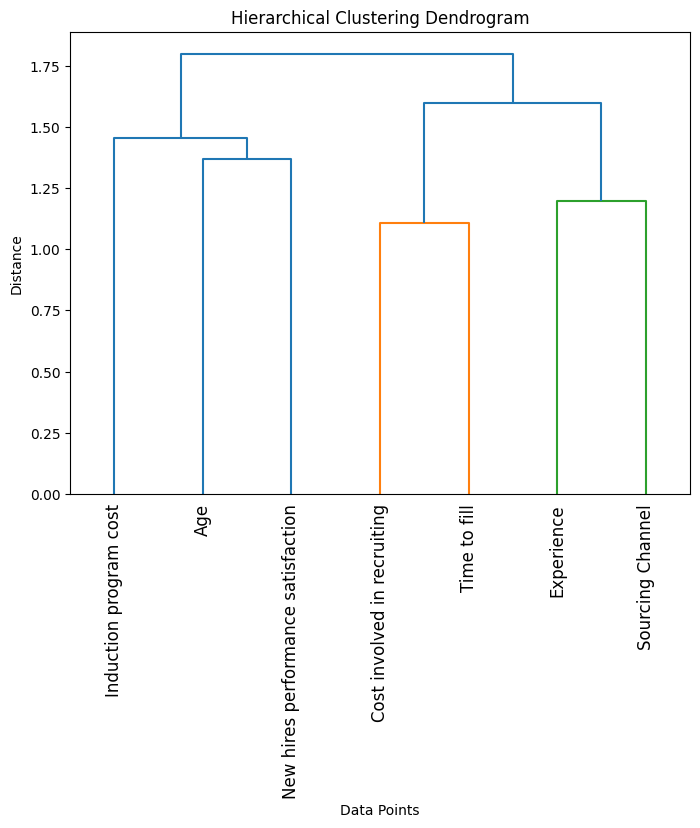

In [7]:
from scipy.cluster.hierarchy import linkage, dendrogram
# Perform hierarchical clustering
linkage_matrix = linkage(correlation, method='ward')

# Plot the dendrogram
plt.figure(figsize=(8, 6))
dendrogram(linkage_matrix, labels=correlation.index, orientation='top')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.xticks(rotation=90)
plt.ylabel('Distance')
plt.show()